# Odds for dice rolls

In [1]:
from util.calculation import calc, advantage
from util.plotter import plot_data_random, plot_data_adv
from util.read_files import one_die, one_die_adv, two_dice, two_dice_adv, four_dice, four_dice_adv

d6 = range(1, 7)

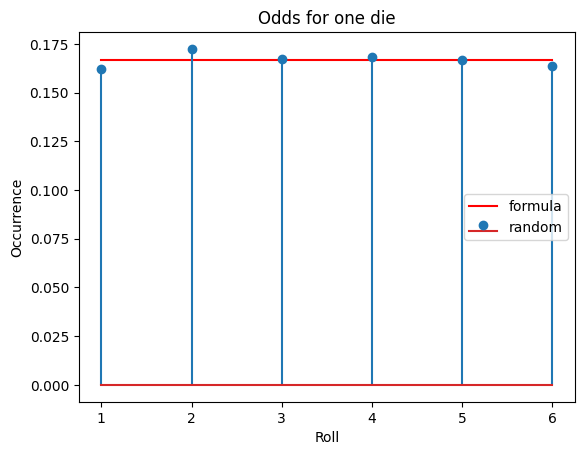

In [2]:
calc_one_die=calc(d6)
plot_data_random(calc_one_die, one_die(), "Odds for one die")

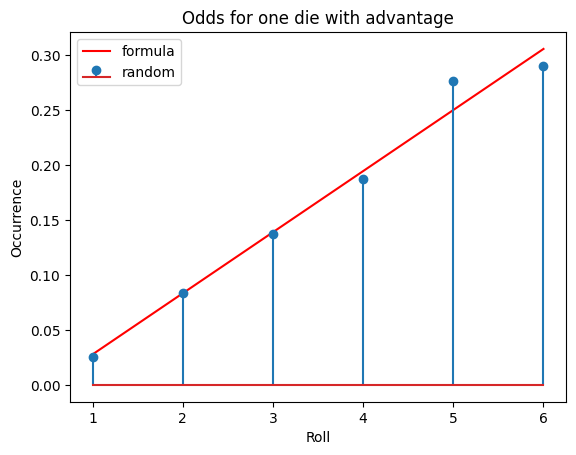

In [3]:
calc_one_die_adv=calc(d6, roll_func=advantage)
plot_data_random(calc_one_die_adv, one_die_adv(), "Odds for one die with advantage")

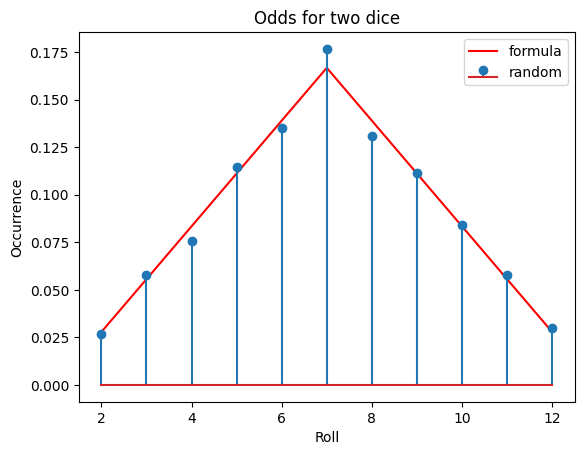

In [4]:
calc_two_dice=calc(d6, 2)
plot_data_random(calc_two_dice, two_dice(), "Odds for two dice")

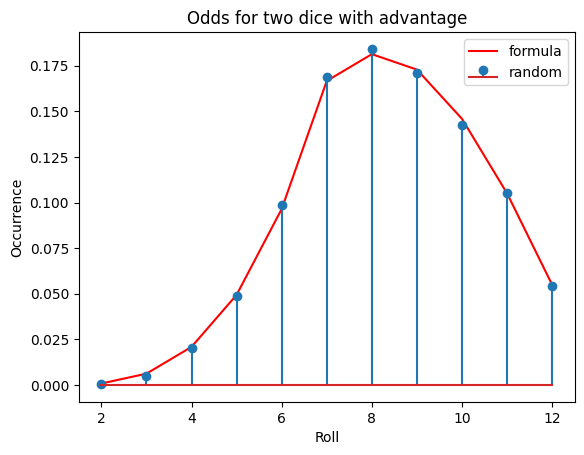

In [5]:
calc_two_dice_adv=calc(d6, 2, advantage)
plot_data_random(calc_two_dice_adv, two_dice_adv(), "Odds for two dice with advantage")

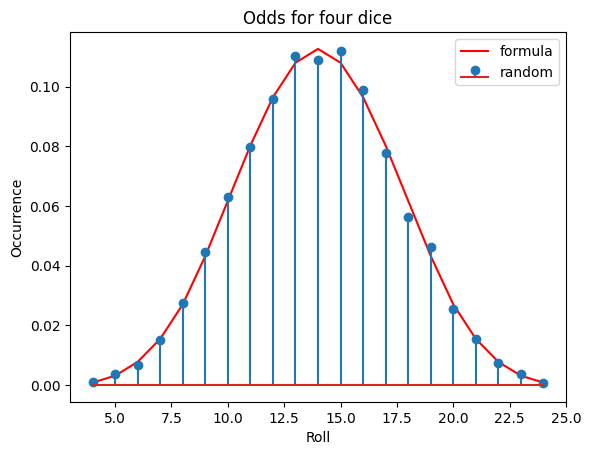

In [6]:
calc_four_dice=calc(d6, 4)
plot_data_random(calc_four_dice, four_dice(), "Odds for four dice")

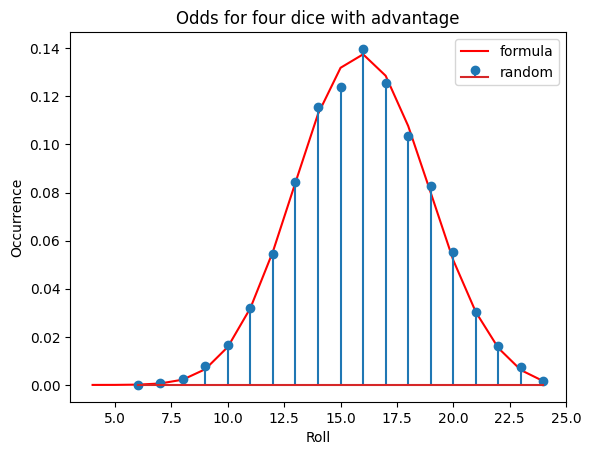

In [7]:
calc_four_dice_adv=calc(d6, 4, advantage)
plot_data_random(calc_four_dice_adv, four_dice_adv(), "Odds for four dice with advantage")

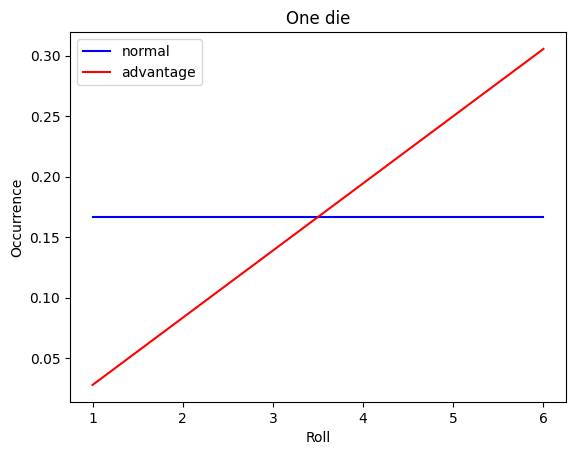

In [8]:
plot_data_adv(calc_one_die, calc_one_die_adv, "One die")

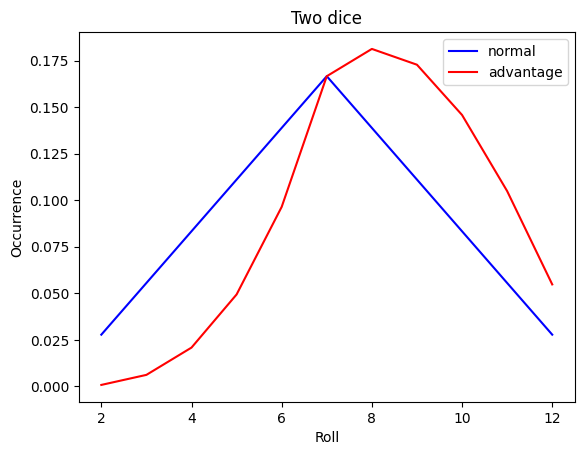

In [9]:
plot_data_adv(calc_two_dice, calc_two_dice_adv, "Two dice")

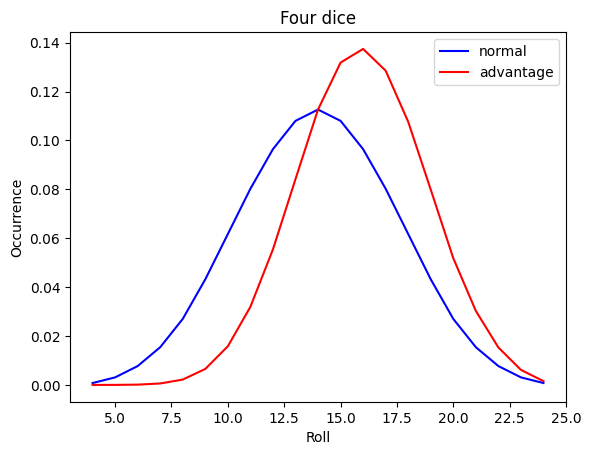

In [10]:
plot_data_adv(calc_four_dice, calc_four_dice_adv, "Four dice")